# Still Standing 001

Importing libraries needed to run the rest of the notebook

In [195]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter
%matplotlib inline

## Read and check Data

Reading CSV files from [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/dev?id=6483394247866966083&hl=en) by [Vieyra Software](https://www.vieyrasoftware.net/).

In [3]:
filename = '../1-raw/2023-01-0111.02.02.csv'
data = pd.read_csv(filename, delimiter=';',decimal=',',index_col=0, low_memory=False)

### Check files

Before moving on we should briefly check what we have imported.

In [4]:
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 22
time,,,,,,,,,,,,,,,,,,,,,
0.074115,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000",0.0,0.0000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0,NaN
0.074978,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0423","0,0405","−0,0350",0.0000,...,"0,0000",0.0,0.0000,"0,0000","0,0000",−∞,59.931854,10.718633,0.0,NaN
0.075414,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0423","0,0405","−0,0350",0.0000,...,"0,0000",0.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0,NaN
0.075772,"−0,2348","0,2832","0,9428","0,0656","−0,7113","0,3842","0,0423","0,0405","−0,0350",0.0000,...,"0,0000",0.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0,NaN
0.092828,"−0,2348","0,2832","0,9428","0,0656","−0,7113","0,3842","0,0423","0,0405","−0,0350",0.0000,...,"0,0000",57.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593.503691,"−0,8331","0,0225","0,5825","0,0023","−0,1708","0,3654","−0,0994","−0,0603","−0,1571",998.3093,...,"−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0,NaN
593.504193,"−0,8331","0,0225","0,5825","−0,0517","−0,2418","0,2183","−0,0994","−0,0603","−0,1571",998.3093,...,"−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0,NaN
593.504714,"−0,8561","0,0452","0,5636","−0,0517","−0,2418","0,2183","−0,0994","−0,0603","−0,1571",998.3093,...,"−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0,NaN


There is one column too much, due to a semicolon at the end of the file. Therefore, we remove the extra column like this:

In [5]:
data = data.drop(data.columns[21],axis=1)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
0.074115,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000","0,0000",0.0,0.0000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0
0.074978,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0423","0,0405","−0,0350",0.0000,...,"0,0000","0,0000",0.0,0.0000,"0,0000","0,0000",−∞,59.931854,10.718633,0.0
0.075414,"−0,2348","0,2832","0,9428","0,0000","0,0000","0,0000","0,0423","0,0405","−0,0350",0.0000,...,"0,0000","0,0000",0.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0
0.075772,"−0,2348","0,2832","0,9428","0,0656","−0,7113","0,3842","0,0423","0,0405","−0,0350",0.0000,...,"0,0000","0,0000",0.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0
0.092828,"−0,2348","0,2832","0,9428","0,0656","−0,7113","0,3842","0,0423","0,0405","−0,0350",0.0000,...,"0,0000","0,0000",57.0,330.8615,"−20,8234","−14,9615",−∞,59.931854,10.718633,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593.503691,"−0,8331","0,0225","0,5825","0,0023","−0,1708","0,3654","−0,0994","−0,0603","−0,1571",998.3093,...,"16,8000","−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0
593.504193,"−0,8331","0,0225","0,5825","−0,0517","−0,2418","0,2183","−0,0994","−0,0603","−0,1571",998.3093,...,"16,8000","−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0
593.504714,"−0,8561","0,0452","0,5636","−0,0517","−0,2418","0,2183","−0,0994","−0,0603","−0,1571",998.3093,...,"16,8000","−7,8600",234.0,324.8409,"−2,7007","−55,9146","48,2682",59.932421,10.718777,0.0


Let us just check what data types we have read in: 

In [6]:
data.dtypes

gFx             object
gFy             object
gFz             object
ax              object
ay              object
az              object
wx              object
wy              object
wz              object
p              float64
Bx             float64
By              object
Bz              object
I              float64
Azimuth        float64
Pitch           object
Roll            object
Gain            object
Latitude       float64
Longitude      float64
Speed (m/s)    float64
dtype: object

There is obviously something wrong, since only one column has loaded with float values. By visual inspection we see that the minus signs are coded with a − (n-dash) instead of hyphen. This makes the importer fail, so that the decimal marker has not properly been changed from comma (,) to dot (.). So we need to change this. 

In [7]:
# Replacing n-dash with hyphen
data=data.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
data=data.replace(to_replace=',', value='.',regex=True)
# Replacing comma with dot
data=data.replace(to_replace='∞', value='0',regex=True)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
0.074115,-0.2348,0.2832,0.9428,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0,0.000000,0.000000,0.0
0.074978,-0.2348,0.2832,0.9428,0.0000,0.0000,0.0000,0.0423,0.0405,-0.0350,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0,59.931854,10.718633,0.0
0.075414,-0.2348,0.2832,0.9428,0.0000,0.0000,0.0000,0.0423,0.0405,-0.0350,0.0000,...,0.0000,0.0000,0.0,330.8615,-20.8234,-14.9615,-0,59.931854,10.718633,0.0
0.075772,-0.2348,0.2832,0.9428,0.0656,-0.7113,0.3842,0.0423,0.0405,-0.0350,0.0000,...,0.0000,0.0000,0.0,330.8615,-20.8234,-14.9615,-0,59.931854,10.718633,0.0
0.092828,-0.2348,0.2832,0.9428,0.0656,-0.7113,0.3842,0.0423,0.0405,-0.0350,0.0000,...,0.0000,0.0000,57.0,330.8615,-20.8234,-14.9615,-0,59.931854,10.718633,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593.503691,-0.8331,0.0225,0.5825,0.0023,-0.1708,0.3654,-0.0994,-0.0603,-0.1571,998.3093,...,16.8000,-7.8600,234.0,324.8409,-2.7007,-55.9146,48.2682,59.932421,10.718777,0.0
593.504193,-0.8331,0.0225,0.5825,-0.0517,-0.2418,0.2183,-0.0994,-0.0603,-0.1571,998.3093,...,16.8000,-7.8600,234.0,324.8409,-2.7007,-55.9146,48.2682,59.932421,10.718777,0.0
593.504714,-0.8561,0.0452,0.5636,-0.0517,-0.2418,0.2183,-0.0994,-0.0603,-0.1571,998.3093,...,16.8000,-7.8600,234.0,324.8409,-2.7007,-55.9146,48.2682,59.932421,10.718777,0.0


In [8]:
# Now that the data should have been formatted correctly, we can change to float64
data=data.astype(float)
data.dtypes

gFx            float64
gFy            float64
gFz            float64
ax             float64
ay             float64
az             float64
wx             float64
wy             float64
wz             float64
p              float64
Bx             float64
By             float64
Bz             float64
I              float64
Azimuth        float64
Pitch          float64
Roll           float64
Gain           float64
Latitude       float64
Longitude      float64
Speed (m/s)    float64
dtype: object

Then we should be ready to go. Let us just check the sampling rate first.

In [57]:
# The sampling rate is the total number of samples divided by time
sr = len(data)/data.index[-1]
sr

170.62213122397688

## Getting an overview of the data

Then we can look at some basic descriptive statistics.

In [62]:
data.describe(include='all')

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
count,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,...,101268.000000,101268.000000,101268.00000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.000000,101268.0
mean,-1.000430,0.091489,0.134388,-0.140488,-0.004988,0.035297,0.005699,0.001886,0.000337,998.154722,...,16.086815,10.313882,214.89436,321.353755,-5.481251,-82.382426,43.103215,59.931942,10.718835,0.0
std,0.033239,0.021691,0.048280,0.139313,0.084761,0.212472,0.052784,0.237732,0.052337,12.933789,...,1.766962,2.493847,47.16474,2.865233,5.988624,3.271324,8.771562,0.188333,0.033684,0.0
min,-1.976000,-0.212100,-1.029500,-10.182000,-2.201800,-12.815200,-1.230700,-3.483600,-1.501700,0.000000,...,-6.780000,-15.060000,0.00000,0.000000,-176.410600,-89.814800,-0.000000,0.000000,0.000000,0.0
25%,-1.005100,0.083800,0.123600,-0.160900,-0.025700,0.013700,-0.001100,-0.017000,-0.003200,998.302500,...,15.720000,9.420000,177.00000,320.556400,-5.564050,-83.091200,40.184000,59.932506,10.718889,0.0
50%,-1.002700,0.089700,0.132700,-0.140300,-0.005100,0.035500,0.005000,-0.001700,0.000500,998.322800,...,16.260000,10.140000,199.00000,321.905500,-5.160100,-82.524800,40.726700,59.932533,10.718943,0.0
75%,-1.000200,0.096300,0.139500,-0.119500,0.017300,0.056100,0.011100,0.016600,0.004100,998.342300,...,16.740000,11.040000,252.00000,322.800000,-4.803600,-82.162450,41.740800,59.932628,10.718978,0.0
max,-0.208100,0.539900,1.037600,1.775800,1.648200,13.238100,3.356200,17.501400,2.446400,998.409200,...,41.220000,60.900000,300.00000,342.746500,11.266100,0.000000,100.724000,59.932803,10.719198,0.0


A basic plot of all the data will give us an idea about the temporal development.

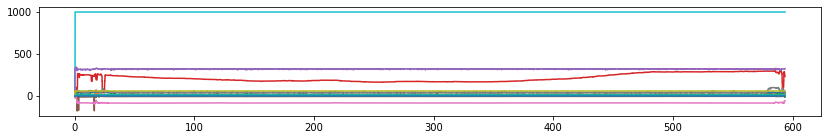

In [63]:
fig = plt.figure(figsize=(14,2))
plt.plot(data);

It is difficult to see exactly what is happening at the beginning and end. Since the accelerometer data may be what we are most interested in, let us only plot that data stream.

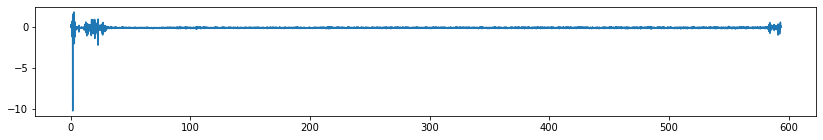

In [64]:
fig = plt.figure(figsize=(14,2))
plt.plot(data.ax);

We can see that there is a lot of movement in the beginning and end. This is when I moved the mobile phone before and after the experiment. So I want to remove those parts. 

In [65]:
data_without_beginning = data.tail(-6000)

In [66]:
data_clean = data_without_beginning.head(-2000)

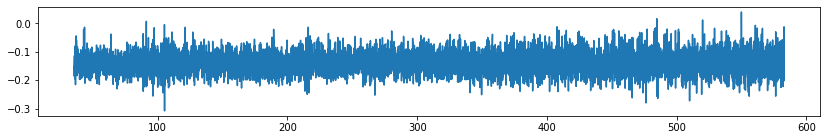

In [67]:
fig = plt.figure(figsize=(14,2))
plt.plot(data_clean.ax);

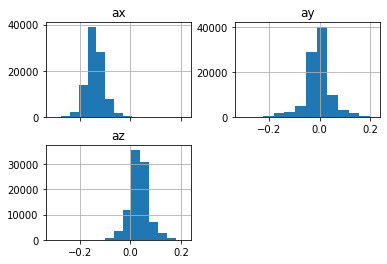

In [189]:
data_clean.hist(['ax','ay','az'],sharex=True);

In [68]:
data_clean

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
35.549884,-1.0014,0.0880,0.1114,-0.1586,-0.0868,-0.0201,0.0118,0.0057,-0.0014,998.3035,...,16.02,11.52,242.0,321.1258,-5.8330,-83.4134,41.2639,59.932758,10.718828,0.0
35.550442,-1.0014,0.0880,0.1114,-0.1586,-0.0868,-0.0201,0.0118,0.0057,-0.0014,998.3140,...,16.02,11.52,242.0,321.1258,-5.8330,-83.4134,41.2639,59.932758,10.718828,0.0
35.551214,-1.0014,0.0880,0.1114,-0.1586,-0.0868,-0.0201,0.0118,0.0057,-0.0014,998.3140,...,16.02,11.52,241.0,321.1258,-5.8330,-83.4134,41.2639,59.932758,10.718828,0.0
35.570640,-1.0000,0.0911,0.1180,-0.1586,-0.0868,-0.0201,0.0118,0.0057,-0.0014,998.3140,...,16.02,11.52,241.0,321.1258,-5.8330,-83.4134,41.2639,59.932758,10.718828,0.0
35.572232,-1.0000,0.0911,0.1180,-0.1586,-0.0868,-0.0201,0.0118,0.0057,-0.0014,998.3140,...,15.96,11.70,241.0,321.1258,-5.8330,-83.4134,41.2639,59.932758,10.718828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582.767570,-0.9968,0.0884,0.1234,-0.1632,0.0318,-0.0610,-0.0084,0.0545,0.0212,998.3315,...,14.82,11.88,297.0,318.9320,-4.6593,-82.5481,100.1110,59.932444,10.718838,0.0
582.784390,-0.9966,0.0923,0.1334,-0.1632,0.0318,-0.0610,-0.0084,0.0545,0.0212,998.3315,...,14.82,11.88,297.0,318.9320,-4.6593,-82.5481,100.1110,59.932444,10.718838,0.0
582.785347,-0.9966,0.0923,0.1334,-0.1632,0.0318,-0.0610,-0.0084,0.0545,0.0212,998.3315,...,16.32,10.62,297.0,318.9320,-4.6593,-82.5481,100.1110,59.932444,10.718838,0.0


Now we finally have a dataset that we can investigate further. Before moving on, let us save it as a clean CSV file. 

In [238]:
data_clean.to_csv('2023-01-01_clean.csv')

| Name           | Description   | Unit |
|:----           |:-----------   |:---- |
| gFx            | g-force X     | FN/Fg |
| gFy            | g-force Y     | FN/Fg |
| gFz            | g-force Z     | FN/Fg |
| ax             | linear acceleration X | m/s2 |
| ay             | linear acceleration Y | m/s2 |
| az             | linear acceleration Z | m/s2 |
| wx             | gyroscope X   | rad/s |
| wy             | gyroscope Y   | rad/s |
| wz             | gyroscope Z   | rad/s |
| p              | barometer     | Pa |
| Bx             | magnetometer X | μT |
| By             | magnetometer Y | μT |
| Bz             | magnetometer Z | μT |
| I              | light meter   | lx |
| Azimuth        | inclinometer  | |
| Pitch          | inclinometer  | |
| Roll           | inclinometer  | |
| Gain           | sound meter   | dB |
| Latitude       | GPS Latitude  | degrees |
| Longitude      | GPS Longitude | degrees |
| Speed | m/s)   | GPS Speed     | km/h |

## Accelerometer data

Let us start by looking at the temporal development of data from the 3-axis accelerometer.

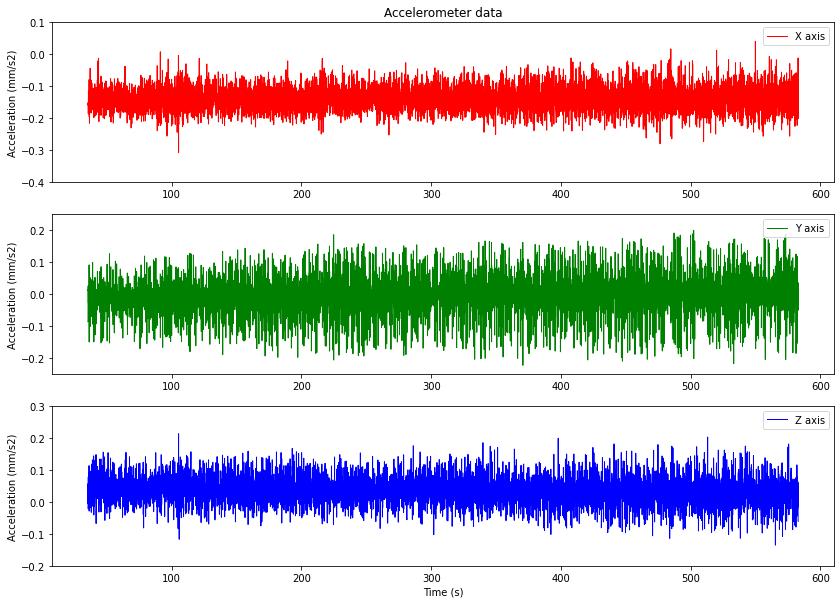

In [239]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['ax'], lw=1, label='X axis', color='red')
aa1.legend(loc='upper right')
aa1.set_ylim(-0.4, 0.1)
plt.ylabel('Acceleration (mm/s2)');
plt.title('Accelerometer data')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['ay'], lw=1, label='Y axis', color='green')
aa2.legend(loc='upper right')
aa2.set_ylim(-0.25, 0.25)
plt.ylabel('Acceleration (mm/s2)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['az'], lw=1, label='Z axis', color='blue')
aa3.legend(loc='upper right')
aa3.set_ylim(-0.2, 0.3)
plt.ylabel('Acceleration (mm/s2)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("accelerometer_time.png", bbox_inches='tight')

As expected, the data varies slightly over time, but the numbers are very small. We can also inspect the spatial distribution of the same sensor data.

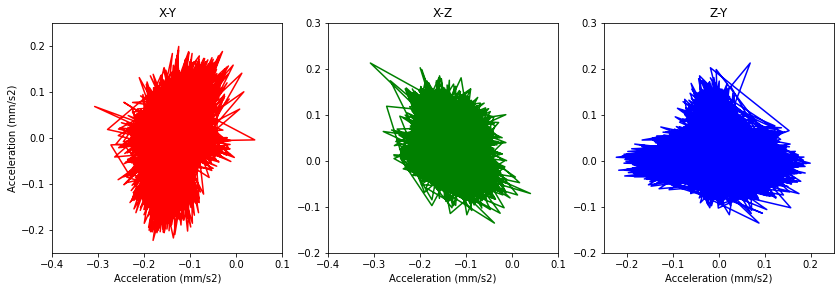

In [240]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(data_clean['ax'], data_clean['ay'], color='r') #XY plane
plt.ylabel('Acceleration (mm/s2)');
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Y')
aa.set_xlim(-0.4, 0.1)
aa.set_ylim(-0.25, 0.25)
aa.set_aspect('equal')

ab = plt.subplot(1, 3, 2)
plt.plot(data_clean['ax'], data_clean['az'], color='g') #XZ plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Z')
ab.set_xlim(-0.4, 0.1)
ab.set_ylim(-0.2, 0.3)
ab.set_aspect('equal')

ac = plt.subplot(1, 3, 3)
plt.plot(data_clean['ay'], data_clean['az'], color='b') #ZY plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('Z-Y')
ac.set_xlim(-0.25, 0.25)
ac.set_ylim(-0.2, 0.3)
ac.set_aspect('equal')

fig.savefig("accelerometer_planar.png", bbox_inches='tight')

## Gyroscope

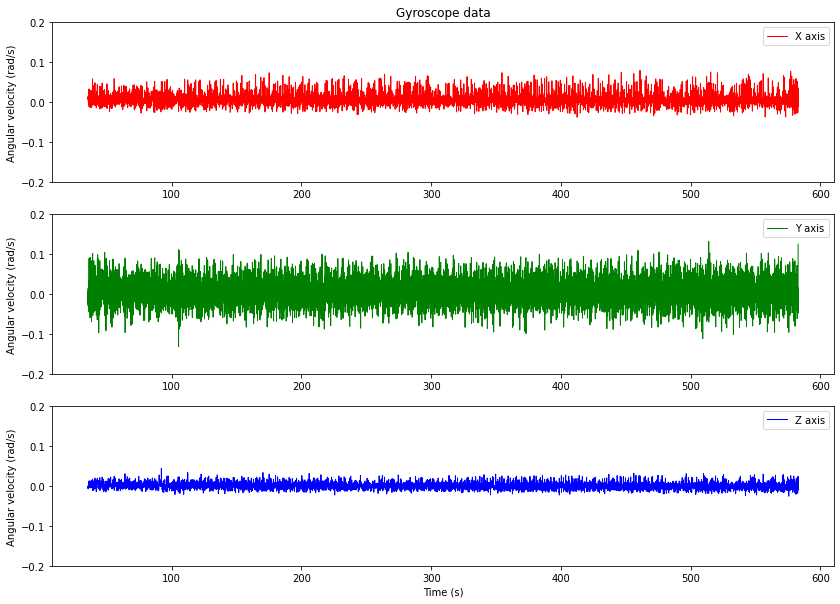

In [241]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['wx'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-0.2, 0.2)
plt.ylabel('Angular velocity (rad/s)');
plt.title('Gyroscope data')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['wy'], lw=1, label='Y axis', color='green') #Displacement on x axis
aa2.legend(loc='upper right')
aa2.set_ylim(-0.2, 0.2)
plt.ylabel('Angular velocity (rad/s)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['wz'], lw=1, label='Z axis', color='blue') #Displacement on x axis
aa3.legend(loc='upper right')
aa3.set_ylim(-0.2, 0.2)
plt.ylabel('Angular velocity (rad/s)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("gyroscope_time.png", bbox_inches='tight')

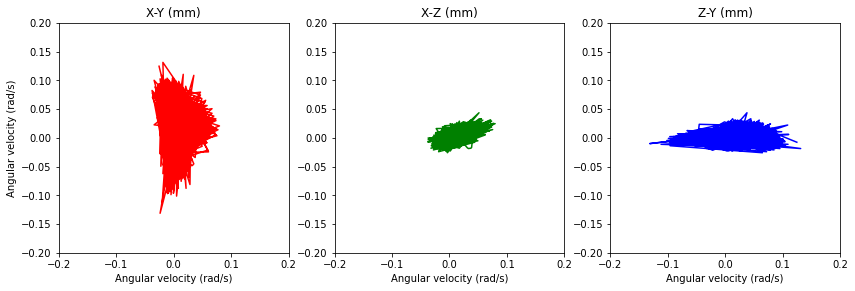

In [242]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(data_clean['wx'], data_clean['wy'], color='r') #XY plane
plt.title('X-Y (mm)')
plt.ylabel('Angular velocity (rad/s)');
plt.xlabel('Angular velocity (rad/s)');
aa.set_xlim(-0.2, 0.2)
aa.set_ylim(-0.2, 0.2)
aa.set_aspect('equal')

ab = plt.subplot(1, 3, 2)
plt.plot(data_clean['wx'], data_clean['wz'], color='g') #XZ plane
plt.title('X-Z (mm)')
plt.xlabel('Angular velocity (rad/s)');
ab.set_xlim(-0.2, 0.2)
ab.set_ylim(-0.2, 0.2)
ab.set_aspect('equal')

ac = plt.subplot(1, 3, 3)
plt.plot(data_clean['wy'], data_clean['wz'], color='b') #ZY plane
plt.title('Z-Y (mm)')
plt.xlabel('Angular velocity (rad/s)');
ac.set_xlim(-0.2, 0.2)
ac.set_ylim(-0.2, 0.2)
ac.set_aspect('equal')

fig.savefig("gyroscope-planar.png", bbox_inches='tight')

### G-force meter

The g-force meter measures the ratio of normal force to gravitational force (FN/Fg) in three dimensions. The g-force changes whenever the mobile device accelerates: speeds up, slows down, or changes direction. When the mobile device is not accelerating and lying face-up with respect to the surface of the earth, it reads g-force values of 0, 0, 1.

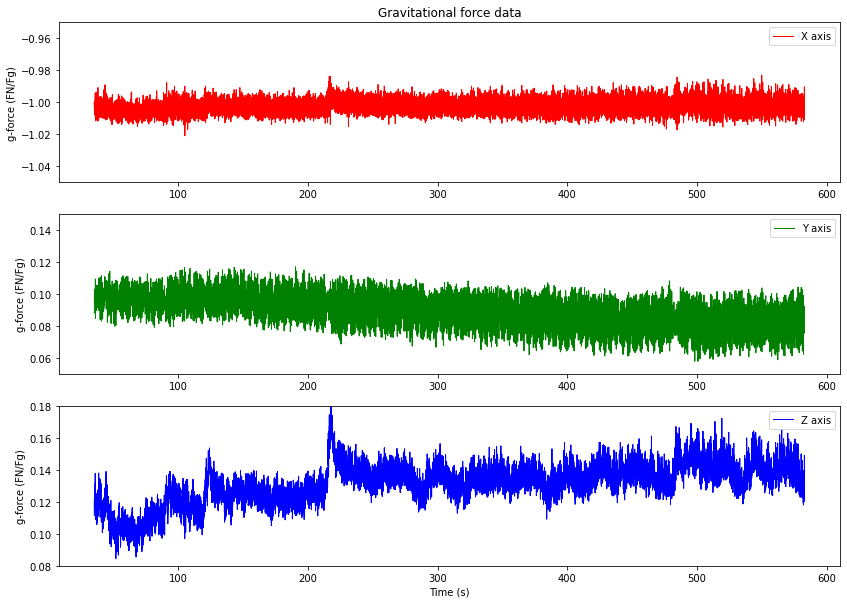

In [279]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['gFx'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-1.05, -0.95)
plt.ylabel('g-force (FN/Fg)');
plt.title('Gravitational force data')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['gFy'], lw=1, label='Y axis', color='green') #Displacement on y axis
aa2.set_ylim(0.05, 0.15)
aa2.legend(loc='upper right')
plt.ylabel('g-force (FN/Fg)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['gFz'], lw=1, label='Z axis', color='blue') #Displacement on z axis
aa3.set_ylim(0.08, 0.18)
aa3.legend(loc='upper right')
plt.ylabel('g-force (FN/Fg)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("g-force-time.pdf", bbox_inches='tight')

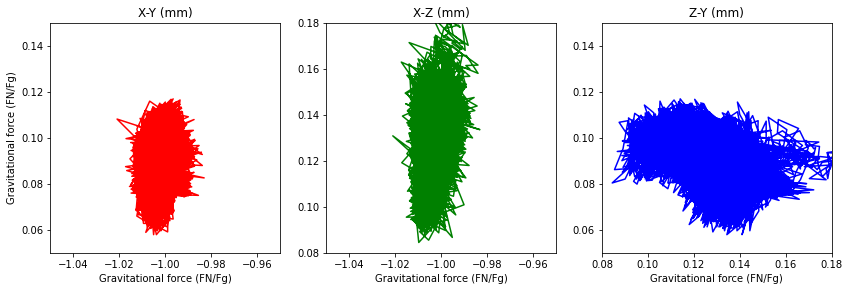

In [304]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(data_clean['gFx'], data_clean['gFy'], color='r') #XY plane
plt.title('X-Y (mm)')
aa.set_xlim(-1.05, -0.95)
aa.set_ylim(0.05, 0.15)
plt.xlabel('Gravitational force (FN/Fg)');
plt.ylabel('Gravitational force (FN/Fg)');
aa.set_aspect('equal')

ab = plt.subplot(1, 3, 2)
plt.plot(data_clean['gFx'], data_clean['gFz'], color='g') #XZ plane
ab.set_xlim(-1.05, -0.95)
ab.set_ylim(0.08, 0.18)
plt.title('X-Z (mm)')
plt.xlabel('Gravitational force (FN/Fg)');
ab.set_aspect('equal')

ac = plt.subplot(1, 3, 3)
plt.plot(data_clean['gFz'], data_clean['gFy'], color='b') #ZY plane
ac.set_xlim(0.08, 0.18)
ac.set_ylim(0.05, 0.15)
plt.title('Z-Y (mm)')
plt.xlabel('Gravitational force (FN/Fg)');
ac.set_aspect('equal')

fig.savefig("g-force-planar.pdf", bbox_inches='tight')

## Combined linear acceleration plot

We apply a Savitzky-Golay filter on the whole dataframe: 

In [305]:
window = 1001 # This is approximately 
order = 4

data_sg = pd.DataFrame(savgol_filter(data_clean, window, order, axis=0),
                                columns=data_clean.columns,
                                index=data_clean.index)

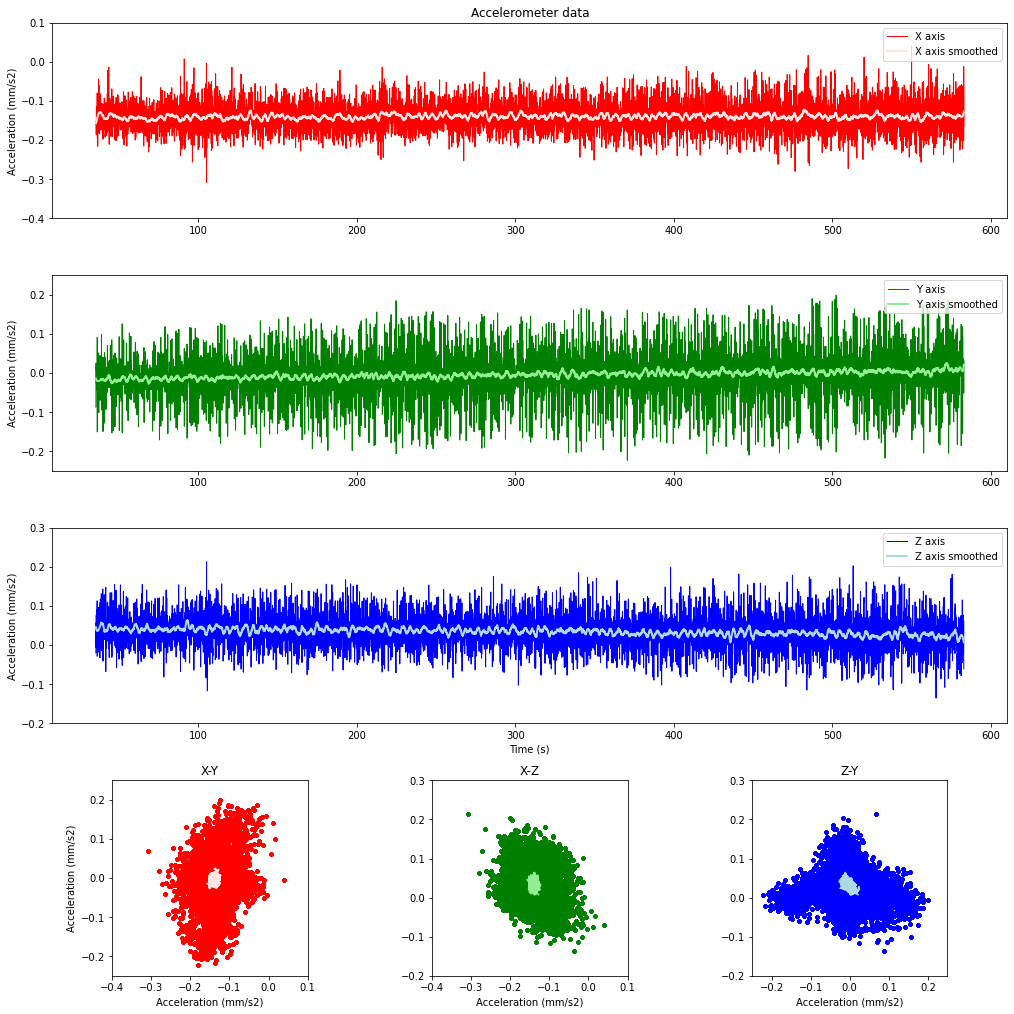

In [306]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
ax1.plot(data_clean['ax'], lw=1, label='X axis', color='red')
ax1.plot(data_sg['ax'], lw=2, label='X axis smoothed', color='mistyrose')
ax1.legend(loc='upper right')
ax1.set_ylim(-0.4, 0.1)
plt.ylabel('Acceleration (mm/s2)');
plt.title('Accelerometer data')

ax2 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
ax2.plot(data_clean['ay'], lw=1, label='Y axis', color='green')
ax2.plot(data_sg['ay'], lw=2, label='Y axis smoothed', color='lightgreen')
ax2.legend(loc='upper right')
ax2.set_ylim(-0.25, 0.25)
plt.ylabel('Acceleration (mm/s2)');

ax3 = plt.subplot2grid((4, 3), (2, 0), colspan=3)
ax3.plot(data_clean['az'], lw=1, label='Z axis', color='blue')
ax3.plot(data_sg['az'], lw=2, label='Z axis smoothed', color='lightblue')
ax3.legend(loc='upper right')
ax3.set_ylim(-0.2, 0.3)
plt.ylabel('Acceleration (mm/s2)');
plt.xlabel('Time (s)');

ax4 = plt.subplot2grid((4, 3), (3, 0))
plt.plot(data_clean['ax'], data_clean['ay'], color='red', marker='.', linestyle='') #XY plane
plt.plot(data_sg['ax'], data_sg['ay'], color='mistyrose') #XY plane
plt.ylabel('Acceleration (mm/s2)');
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Y')
ax4.set_xlim(-0.4, 0.1)
ax4.set_ylim(-0.25, 0.25)
ax4.set_aspect('equal')

ax5 = plt.subplot2grid((4, 3), (3, 1))
plt.plot(data_clean['ax'], data_clean['az'], color='green', marker='.', linestyle='') #XZ plane
plt.plot(data_sg['ax'], data_sg['az'], color='lightgreen') #XZ plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('X-Z')
ax5.set_xlim(-0.4, 0.1)
ax5.set_ylim(-0.2, 0.3)
ax5.set_aspect('equal')

ax6 = plt.subplot2grid((4, 3), (3, 2))
plt.plot(data_clean['ay'], data_clean['az'], color='blue', marker='.', linestyle='') #ZY plane
plt.plot(data_sg['ay'], data_sg['az'], color='lightblue') #ZY plane
plt.xlabel('Acceleration (mm/s2)');
plt.title('Z-Y')
ax6.set_xlim(-0.25, 0.25)
ax6.set_ylim(-0.2, 0.3)
ax6.set_aspect('equal')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.savefig("accelerometer_time_space.png", bbox_inches='tight', facecolor='white',transparent=False)

## Statistics

In [315]:
data_clean.describe()

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
count,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,...,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.000000,93268.0
mean,-1.002697,0.089487,0.130662,-0.139995,-0.004675,0.034627,0.005883,0.000710,0.000516,998.324504,...,16.165395,10.333334,213.298034,321.559803,-5.157844,-82.672827,41.653659,59.932567,10.718959,0.0
std,0.003690,0.007925,0.012430,0.033597,0.049536,0.037919,0.012621,0.029475,0.006602,0.026409,...,0.970113,1.534255,45.202743,1.969714,0.386575,0.698026,5.084011,0.000080,0.000079,0.0
min,-1.021000,0.057900,0.084500,-0.308200,-0.223000,-0.135300,-0.037700,-0.131200,-0.025800,998.237100,...,-6.780000,6.780000,164.000000,309.062400,-5.962000,-84.872300,38.959500,59.932442,10.718828,0.0
25%,-1.005100,0.083800,0.123600,-0.160200,-0.024200,0.014400,-0.000500,-0.016300,-0.003200,998.305400,...,15.780000,9.420000,175.000000,320.779800,-5.528900,-83.084400,40.154500,59.932508,10.718892,0.0
50%,-1.002700,0.089200,0.132400,-0.140600,-0.005000,0.035100,0.005000,-0.001700,0.000500,998.324700,...,16.320000,10.080000,195.000000,321.997000,-5.130300,-82.540000,40.651900,59.932550,10.718947,0.0
75%,-1.000500,0.095500,0.138800,-0.121300,0.015800,0.054400,0.010500,0.014800,0.003500,998.344200,...,16.740000,10.980000,249.000000,322.834425,-4.801200,-82.203500,41.365900,59.932632,10.718979,0.0
max,-0.983100,0.117000,0.184700,0.040200,0.199000,0.213000,0.079600,0.131500,0.043800,998.409200,...,19.080000,48.120000,298.000000,326.255000,-4.379500,-80.060600,100.111000,59.932758,10.719160,0.0


We center all data around 0 to more easily inspect the variations.

In [314]:
data_centered = data_clean.sub(data_clean.mean())
data_centered

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
35.549884,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916,-0.021004,...,-0.145395,1.186666,28.701966,-0.434003,-0.675156,-0.740573,-0.389759,0.000190,-0.000132,0.0
35.550442,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916,-0.010504,...,-0.145395,1.186666,28.701966,-0.434003,-0.675156,-0.740573,-0.389759,0.000190,-0.000132,0.0
35.551214,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916,-0.010504,...,-0.145395,1.186666,27.701966,-0.434003,-0.675156,-0.740573,-0.389759,0.000190,-0.000132,0.0
35.570640,0.002697,0.001613,-0.012662,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916,-0.010504,...,-0.145395,1.186666,27.701966,-0.434003,-0.675156,-0.740573,-0.389759,0.000190,-0.000132,0.0
35.572232,0.002697,0.001613,-0.012662,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916,-0.010504,...,-0.205395,1.366666,27.701966,-0.434003,-0.675156,-0.740573,-0.389759,0.000190,-0.000132,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582.767570,0.005897,-0.001087,-0.007262,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684,0.006996,...,-1.345395,1.546666,83.701966,-2.627803,0.498544,0.124727,58.457341,-0.000123,-0.000122,0.0
582.784390,0.006097,0.002813,0.002738,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684,0.006996,...,-1.345395,1.546666,83.701966,-2.627803,0.498544,0.124727,58.457341,-0.000123,-0.000122,0.0
582.785347,0.006097,0.002813,0.002738,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684,0.006996,...,0.154605,0.286666,83.701966,-2.627803,0.498544,0.124727,58.457341,-0.000123,-0.000122,0.0


In [328]:
data_imu = data_centered.iloc[:,0:9]
data_imu

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz
time,,,,,,,,,
35.549884,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916
35.550442,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916
35.551214,0.001297,-0.001487,-0.019262,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916
35.570640,0.002697,0.001613,-0.012662,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916
35.572232,0.002697,0.001613,-0.012662,-0.018605,-0.082125,-0.054727,0.005917,0.00499,-0.001916
...,...,...,...,...,...,...,...,...,...
582.767570,0.005897,-0.001087,-0.007262,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684
582.784390,0.006097,0.002813,0.002738,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684
582.785347,0.006097,0.002813,0.002738,-0.023205,0.036475,-0.095627,-0.014283,0.05379,0.020684


AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

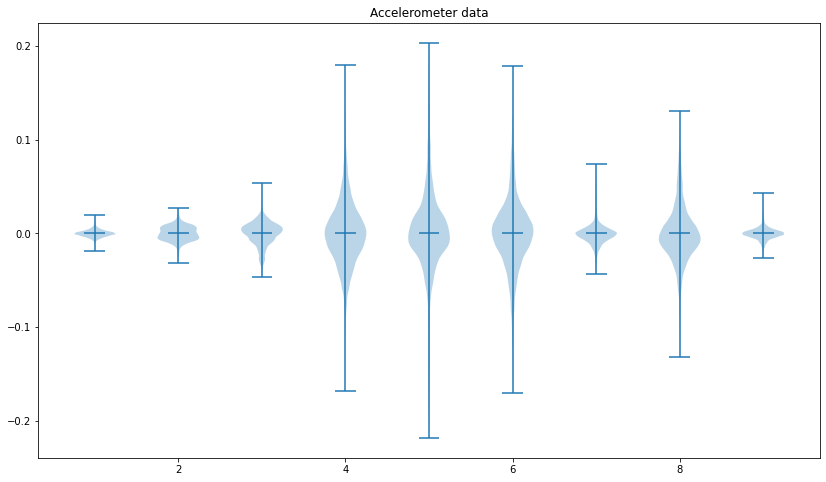

In [329]:
fig = plt.figure(figsize=(14,8))

plt.violinplot(data_imu, showmeans=True)
plt.title('Accelerometer data')
#nocolumns = list(range(1,len(vels_group[46].columns)+1))
#ax.set_xticks(nocolumns)
plt.xticklabels(["", "X", "", "Y", "", "Z"])
plt.xlabel('Acceleration');
plt.ylabel('(mm/s2)');

plt.show()
    
plt.savefig("violinplots.pdf", bbox_inches='tight')

## Calculating norm of displacement

In [365]:
# Calculate difference between samples
displacement = (np.roll(data_clean, -1, axis=0) - data_clean)

In [366]:
# Calculate the vector norm of the displacement
dispnorm = np.sqrt(
         displacement.ax ** 2 +
         displacement.ay ** 2 +
         displacement.az ** 2
    )

In [388]:
dispnorm_sg = savgol_filter(dispnorm, 501, 4)

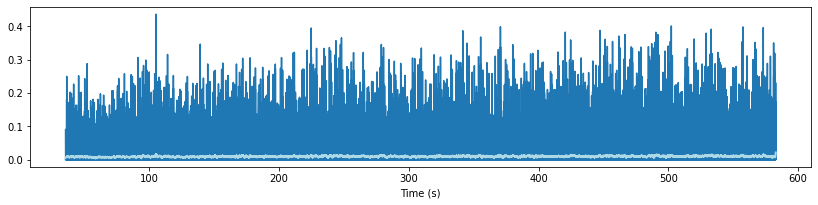

In [389]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)

ax1.plot(dispnorm)
ax1.plot(displacement.index, dispnorm_sg, lw=2, label='X axis smoothed', color='lightblue')

plt.xlabel('Time (s)');
fig.savefig("g-force-time.pdf", bbox_inches='tight')

In [369]:
data_norm = np.sqrt(
         data_clean.ax ** 2 +
         data_clean.ay ** 2 +
         data_clean.az ** 2
    )

In [373]:
data_norm

time
35.549884     0.181913
35.550442     0.181913
35.551214     0.181913
35.570640     0.181913
35.572232     0.181913
                ...   
582.767570    0.177106
582.784390    0.177106
582.785347    0.177106
582.785832    0.177106
582.803897    0.177106
Length: 93268, dtype: float64

In [371]:
# Calculate difference between samples
data_diff = (np.roll(data_norm, -1, axis=0) - data_norm)

In [372]:
data_diff

time
35.549884     0.000000
35.550442     0.000000
35.551214     0.000000
35.570640     0.000000
35.572232     0.000000
                ...   
582.767570    0.000000
582.784390    0.000000
582.785347    0.000000
582.785832    0.000000
582.803897    0.004807
Length: 93268, dtype: float64

In [400]:
data_diff_sg = savgol_filter(dispnorm, 701, 4)
data_diff_sg

array([0.00260927, 0.00272517, 0.00283987, ..., 0.01596801, 0.01610059,
       0.01623466])

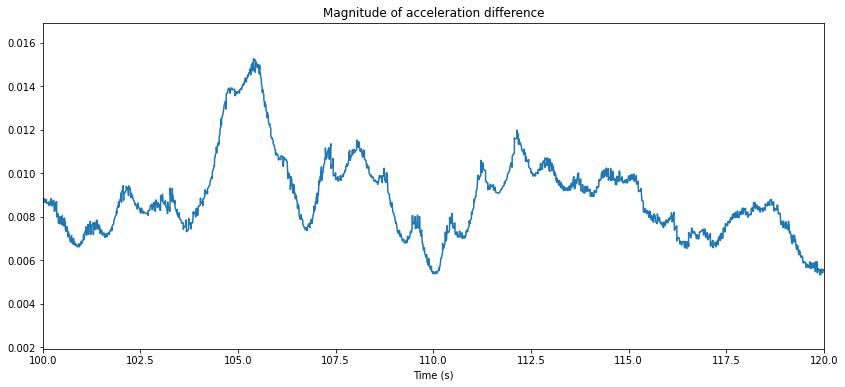

In [401]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1, 1, 1)

#ax1.plot(data_diff)
#ax1.plot(data_diff.index, data_diff_sg, lw=2, label='X axis smoothed', color='lightblue')
ax1.plot(data_diff.index, data_diff_sg)
plt.xlabel('');
plt.title('Magnitude of acceleration difference')
#ax1.set_ylim(-0.03, 0.03)
ax1.set_xlim(100, 120)

plt.xlabel('Time (s)');
fig.savefig("g-force-time.pdf", bbox_inches='tight')

### Distance travelled

#### Cumulative distance travelled

Text(0.5, 1.0, 'Distance travelled trial 1')

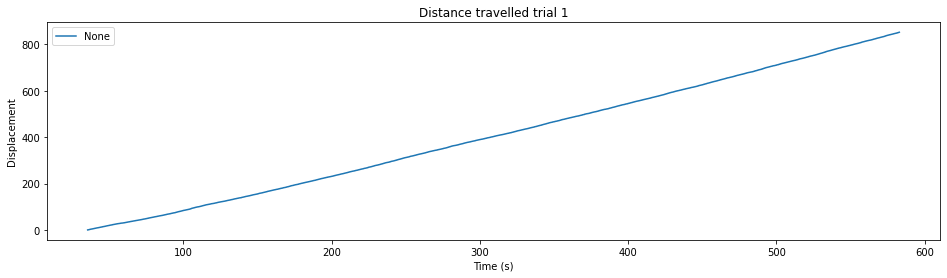

In [406]:
ax = dispnorm.cumsum().plot(figsize=(16,4)) #Indicate group number to plot
#ax.set_ylim(0, 10)
plt.xlabel('Time (s)');
plt.ylabel('Displacement');
plt.legend(loc='upper left')
plt.title('Distance travelled trial 1')

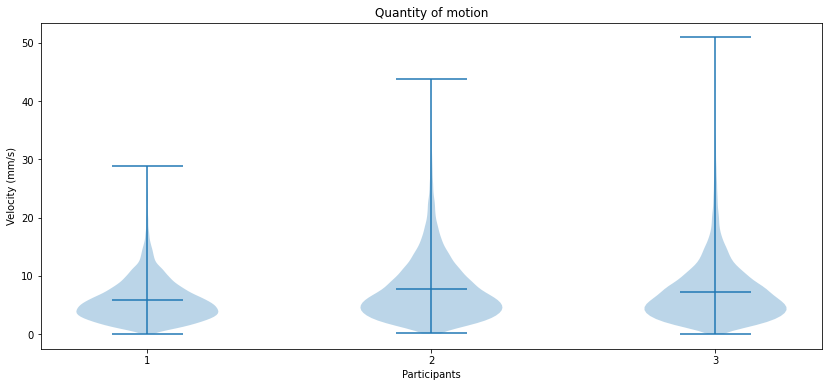

In [273]:
fig, ax = plt.subplots(figsize=(14,6))
ax.violinplot(vels_group[1], showmeans=True)
ax.set_title('Quantity of motion')
nocolumns = list(range(1,len(vels_group[46].columns)+1))
ax.set_xticks(nocolumns)
#ax.set_xticklabels(["Static", "ARJ", "KAB", "VJ"])
plt.xlabel('Participants');
plt.ylabel('Velocity (mm/s)');
plt.show()
    
#fig.savefig("violinplots.pdf", bbox_inches='tight')

In [223]:
#Batch create one plot for each file
fig, ax = plt.subplots(figsize=(14,6))

# create directory to store plots
save_path = 'violinplots'
check_folder = os.path.isdir(save_path)

# If folder doesn't exist, then create it.
if not check_folder:
    os.mkdir(save_path)
    print("created folder : ", save_path)
else:
    print(save_path, "folder already exists.")


for i in range(1,len(vels_group)):
    ax.violinplot(vels_group[i], showmedians=True)
    ax.set_title('Quantity of motion')
    nocolumns = list(range(1,len(vels_group[i].columns)+1))
    ax.set_xticks(nocolumns)
    #todo: add names programmatically
    #ax.set_xticklabels(["Static", "ARJ", "KAB", "VJ"])
    plt.xlabel('Participants');
    plt.ylabel('Velocity (mm/s)');

    # save plots in specified directory
    file_name = "violinplot_" + str(i) + ".png"
    complete_name = os.path.join(save_path, file_name)
    fig.savefig(complete_name, bbox_inches='tight', dpi=150, facecolor="white")
    
    #remove plot from memory
    plt.cla() 

plt.close(fig) #close the figure to free up memory

created folder :  violinplots


### Mean QoM

Trying to add column names. It works but get nested.

In [308]:
mean_QoM = {}    

for i in range(1,num_groups+1):
    mean_QoM[i] = {}
    
    for j in range(1,4):
        mean_QoM[i][j] = pd.DataFrame({['A', 'B', 'C']: (vels_group[i][j].mean())}, index=[0])

TypeError: unhashable type: 'list'

In [328]:
mean_QoM = []

for i in range(1,num_groups+1):
    trial = []
    
    for j in range(1,4):
        trial = np.append(trial, [(vels_group[i][j].mean())], axis=0)
        
    mean_QoM = np.append(mean_QoM, [[trial]])
mean_QoM

array([ 5.78786342,  7.75752602,  7.28824244,  6.61708336,  7.96402682,
        6.41888642,  5.50031242,  7.61538568,  6.81914124,  5.26789759,
        7.48968659,  6.51310332,  6.01393817,  7.40091063,  6.63734557,
        7.76810019,  9.39642905,  8.5153312 ,  7.25407572,  9.21518038,
        8.96057431,  5.45047827,  7.80819941,  7.01561161,  5.17161784,
        7.60061668,  6.67620894,  5.32513682,  7.87807928,  6.26725729,
        5.29015805,  7.65061591,  6.29066879,  4.17564606,  6.33413742,
        5.5723259 ,  5.08083349,  7.48027612,  8.91792049,  5.4855942 ,
        8.22086256,  6.23654218,  5.29810851,  8.10760791,  6.25320176,
        5.04063347,  7.53053474,  6.29580083,  5.58862312,  6.3526815 ,
        5.59504562,  5.11972966,  7.68625607,  6.51516808,  5.43111207,
        7.71184066,  6.40124981,  9.26864545,  7.82457116, 11.70626462,
        5.40883373,  8.29003159,  6.40439131,  4.66001881,  7.9862094 ,
        6.54632938,  4.72688383,  6.65761384,  6.12679268,  5.15

So the old code works better

In [306]:
mean_QoM = {}    

for i in range(1,num_groups+1):
    mean_QoM[i] = {}
    
    for j in range(1,4):
        mean_QoM[i][j] = (vels_group[i][j].mean())

In [307]:
mean_QoM

{1: {1: 5.787863417150483, 2: 7.757526022227368, 3: 7.288242438272251},
 2: {1: 6.617083363872846, 2: 7.96402681651156, 3: 6.4188864159709205},
 3: {1: 5.5003124238787535, 2: 7.615385681113073, 3: 6.8191412428148865},
 4: {1: 5.267897587706444, 2: 7.489686589583408, 3: 6.513103316193795},
 5: {1: 6.01393816964983, 2: 7.400910630404108, 3: 6.6373455669254815},
 6: {1: 7.768100193092179, 2: 9.396429045909873, 3: 8.515331197711836},
 7: {1: 7.2540757195685925, 2: 9.21518037847443, 3: 8.96057431354846},
 8: {1: 5.450478273843785, 2: 7.808199409120011, 3: 7.015611610376303},
 9: {1: 5.171617842812802, 2: 7.600616684040685, 3: 6.676208938500293},
 10: {1: 5.325136824707373, 2: 7.878079284915673, 3: 6.267257293125293},
 11: {1: 5.290158052902171, 2: 7.650615906061976, 3: 6.290668793722455},
 12: {1: 4.175646062845134, 2: 6.33413741804583, 3: 5.572325895404585},
 13: {1: 5.080833485330198, 2: 7.480276119768103, 3: 8.91792048756628},
 14: {1: 5.48559419605476, 2: 8.220862562133675, 3: 6.2365421

In [210]:
for i in range(1,len(mean_QoM)+1):
    print(mean_QoM[i][1])

5.787863417150483
6.617083363872846
5.5003124238787535
5.267897587706444
6.01393816964983
7.768100193092179
7.2540757195685925
5.450478273843785
5.171617842812802
5.325136824707373
5.290158052902171
4.175646062845134
5.080833485330198
5.48559419605476
5.298108511832989
5.0406334720633446
5.588623117304648
5.119729662957889
5.431112074791417
9.268645454563297
5.408833732055834
4.660018811393515
4.726883831290625
5.153912637255325
6.481258266938889
5.3413926688672975
5.734202608377938
5.7025373833080515
4.307080203066785
5.398576236853217
5.3367872457050085
4.912752991301557
5.385940470131791
4.529242625871522
4.834378690765196
4.859608785986628
4.72998137586092
3.890259547939056
5.411101755764852
4.576412849778154
5.434864915479904
5.847422540753495
10.886098526409873
5.835930352603899
5.5607514080512805
5.928441829582431
6.686426651074272
5.725765665680543
5.860924087171359
6.82836637224219


TypeError: float() argument must be a string or a number, not 'dict'

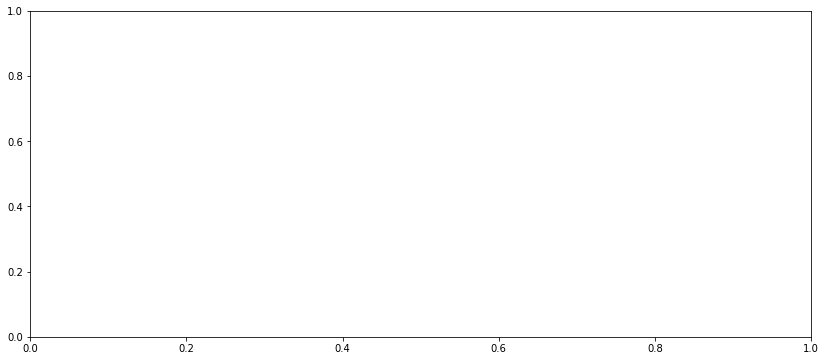

In [280]:
fig, ax = plt.subplots(figsize=(14,6))
#ax.violinplot(mean_QoM, showmeans=True)
ax.plot(mean_QoM)
ax.set_title('Quantity of motion')
#nocolumns = list(range(1,len(vels_group[46].columns)+1))
#ax.set_xticks(nocolumns)
#ax.set_xticklabels(["Static", "ARJ", "KAB", "VJ"])
plt.xlabel('Participants');
plt.ylabel('Velocity (mm/s)');
plt.show()
    
#fig.savefig("violinplots.pdf", bbox_inches='tight')

In [194]:
data[2]

(3, {1: 5.5003124238787535, 2: 7.615385681113073, 3: 6.8191412428148865})

### Heatmap of QoMs

In [224]:
sns.relplot(
    data=vels_group[1], kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

ValueError: Could not interpret input 'timepoint'

In [225]:
vels_group[1]

,1,2,3
Time (s),,,
1.00,2.080865,4.354354,8.347958
1.05,3.069984,6.205449,7.889968
1.10,2.267510,7.759742,6.945761
1.15,2.757753,6.182491,5.680387
1.20,6.773773,4.168309,3.145409
...,...,...,...
599.25,2.709686,6.608510,7.710149
599.30,5.094546,6.163246,9.130367
599.35,4.601261,3.575584,7.695895


In [226]:
sns.heatmap(vels_group, annot=True)

ValueError: Must pass 2-d input

### Smoothing the velocity

#### Calculating the envelope of the velocity using a rolling average

In [227]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(sverm2[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [228]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

vel_envx_group[1] #smoothed velocities group 1

,1,2,3
Time (s),,,
1.00,4.697200,2.754200,5.417400
1.05,4.732673,2.750099,5.405545
1.10,4.742353,2.731373,5.366078
1.15,4.697476,2.718058,5.380971
1.20,4.662692,2.735000,5.444808
...,...,...,...
599.25,6.266286,2.194857,6.740000
599.30,6.274808,2.184423,6.585192
599.35,6.304660,2.186214,6.442330


Text(0.5, 1.0, 'Velocity (QoM) participant 1_2')

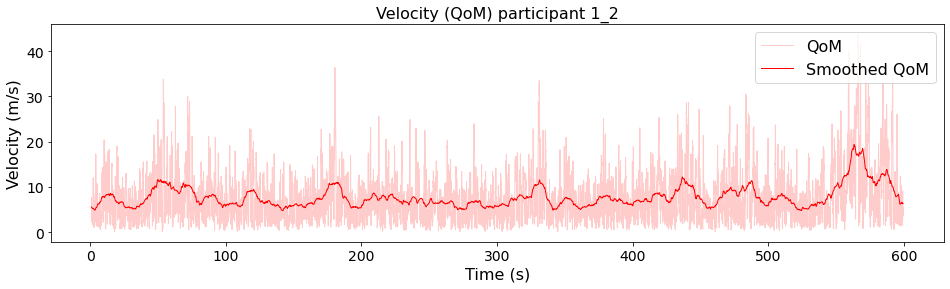

In [229]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(4)
fig.set_figwidth(16)
ax.set_facecolor("white")
ax.plot(vels_group[1][2], lw=1, label='QoM', color='r', alpha=0.2)
ax.plot(velenv[1][2], lw=1, label='Smoothed QoM', color='r')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (mm/s)', fontsize=16);
plt.title('Velocity (QoM) participant 1_2', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants and reference markers in Group 1')

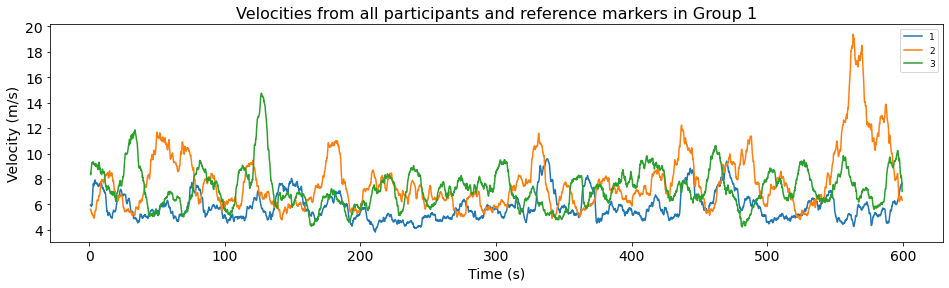

In [230]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[1].plot(figsize=(16,4), fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (mm/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants and reference markers in Group 1', fontsize=16)

In [231]:
#Batch create one plot for each file

# create directory to store plots
save_path = 'qom_smooth'
check_folder = os.path.isdir(save_path)

# If folder doesn't exist, then create it.
if not check_folder:
    os.mkdir(save_path)
    print("created folder : ", save_path)
else:
    print(save_path, "folder already exists.")

for i in range(1,len(vels_group)):
    ax = vel_env_group[i].plot(figsize=(16,4), fontsize=14)
    #ax1.set_facecolor("white")
    plt.xlabel('Time (s)', fontsize=14);
    plt.ylabel('Velocity (mm/s)', fontsize=14);
    plt.legend(loc='upper right', fontsize=9)
    plt.title('Velocities from all participants and reference markers in Group 1', fontsize=16)
    
    # save plots in specified directory
    file_name = "qomplot_" + str(i) + ".png"
    complete_name = os.path.join(save_path, file_name)
    plt.savefig(complete_name, bbox_inches='tight', dpi=150, facecolor="white")
    
    plt.cla()   #remove plot from memory
    plt.close() #close the figure to free up memory

created folder :  qom_smooth


### Mean of Norm of the Velocity (mean QoM)

In [147]:
#Mean of velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(sverm2[groups])+1):
        #velocities[groups][i].loc['mean'] = velocities[groups][i].mean()
        velocities_mean = velocities[groups][i].mean()

In [148]:
vel_mean = {}

for groups in range(1,num_groups+1):
    vel_mean[groups] = {}
    #velocities[groups][i].loc['mean'] = velocities[groups][i].mean()
    vel_mean[groups] = velocities[groups][1].mean()

In [152]:
vel_mean

{1: Velocity    5.787863
 dtype: float64,
 2: Velocity    6.617083
 dtype: float64,
 3: Velocity    5.500312
 dtype: float64,
 4: Velocity    5.267898
 dtype: float64,
 5: Velocity    6.013938
 dtype: float64,
 6: Velocity    7.7681
 dtype: float64,
 7: Velocity    7.254076
 dtype: float64,
 8: Velocity    5.450478
 dtype: float64,
 9: Velocity    5.171618
 dtype: float64,
 10: Velocity    5.325137
 dtype: float64,
 11: Velocity    5.290158
 dtype: float64,
 12: Velocity    4.175646
 dtype: float64,
 13: Velocity    5.080833
 dtype: float64,
 14: Velocity    5.485594
 dtype: float64,
 15: Velocity    5.298109
 dtype: float64,
 16: Velocity    5.040633
 dtype: float64,
 17: Velocity    5.588623
 dtype: float64,
 18: Velocity    5.11973
 dtype: float64,
 19: Velocity    5.431112
 dtype: float64,
 20: Velocity    9.268645
 dtype: float64,
 21: Velocity    5.408834
 dtype: float64,
 22: Velocity    4.660019
 dtype: float64,
 23: Velocity    4.726884
 dtype: float64,
 24: Velocity    5.1539

### Concatenating velocities for all participants in each group

In [235]:
#Number of datasets
len(sverm2)+1

51

In [236]:
num_groups

50

In [237]:
velocities[2][4].mean()

KeyError: 4